In [57]:
import pandas as pd
import seaborn as sns
import itertools
import math
import matplotlib.pyplot as plt
import warnings
import numpy as np
from datetime import timedelta,datetime
import matplotlib.dates as mdates
from functools import reduce
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
%cd "C:\DSBA\Advanced BA\Project"

C:\DSBA\Advanced BA\Project


**Campaign**

In [17]:
df=pd.read_csv('Campaign.csv',encoding="iso-8859-1")
df.head()

,Id,IsDeleted,Name,ParentId,Type,RecordTypeId,Status,StartDate,EndDate,ExpectedRevenue,...,Workshop_Length_In_Days__c,Number_of_Registrants__c,EO_Email_Campaign__c,Recommendation_Rating_Total__c,Number_Recommendation_Ratings__c,Account_Name__c,stayclassy__Classy_Mode_Checked_By_Default__c,stayclassy__Classy_Mode_Enabled__c,stayclassy__Effective_Fixed_FOT_Percent__c,stayclassy__Fixed_FOT_Percent__c
0,7010z000000mBaVAAU,0,O2O Volunteer Program Email,000000000000000AAA,Email,012380000009wCN,Completed,NaN,NaN,NaN,...,NaN,NaN,0.0,0,0,NaN,0.0,0.0,NaN,NaN
1,7010z000000mBazAAE,0,Registration Push,000000000000000AAA,Email,012380000009wCN,Completed,NaN,NaN,NaN,...,NaN,NaN,0.0,0,0,NaN,0.0,0.0,NaN,NaN
2,7010z000000mBcvAAE,0,Mass Email - SES Spanish Bilingual Communicati...,000000000000000AAA,Email,012380000009wCN,In Progress,NaN,NaN,NaN,...,NaN,NaN,1.0,0,0,0010z00001UVARVAA5,0.0,0.0,NaN,NaN
3,7010z000000mBd0AAE,0,Change Health Care_Email Campaign,000000000000000AAA,Email,012380000009wCN,In Progress,NaN,NaN,NaN,...,NaN,NaN,0.0,0,0,0013800001Oeg5VAAR,0.0,0.0,NaN,NaN
4,7010z000000mBiFAAU,0,Mass Email - Evicore Non Clinical Intake 1.16.19,000000000000000AAA,Email,012380000009wCN,Completed,NaN,NaN,NaN,...,NaN,NaN,1.0,0,0,0010z00001SdvU2AAJ,0.0,0.0,NaN,NaN


In [18]:
df_camp=df[['CreatedDate','Type']]
df_camp['count']=1
df_camp['CreatedDate']=pd.to_datetime(df_camp['CreatedDate'])
df_camp["Day_of_Week"] = df_camp.CreatedDate.dt.weekday
df_camp["Date_weekly"] = df_camp.apply(lambda x: x['CreatedDate'] - timedelta(days=x['Day_of_Week']), axis=1)
df_camp["Date_weekly"] = df_camp["Date_weekly"].dt.date
df_camp["Date_weekly"]=pd.to_datetime(df_camp["Date_weekly"])
df_camp.head()

,CreatedDate,Type,count,Day_of_Week,Date_weekly
0,2019-01-15 14:11:00,Email,1,1,2019-01-14
1,2019-01-15 14:41:00,Email,1,1,2019-01-14
2,2019-01-15 21:54:00,Email,1,1,2019-01-14
3,2019-01-15 22:09:00,Email,1,1,2019-01-14
4,2019-01-16 16:23:00,Email,1,2,2019-01-14


In [19]:
df_camp['Type'].value_counts()

Email                              459
Seminar / Conference               439
Fundraiser                         214
Other                               41
Crowdfunding                        37
donation                            31
Donation Page                       20
Team                                15
Ticketed                            13
Career/Professional Development     11
Registration With Fundraising       11
Registration                         8
Fundraising Campaign                 7
peer_to_peer                         6
Industry Expertise                   5
Job Search Skill                     3
Direct Mail                          2
Federal                              1
Fundraise for Entry                  1
Grant                                1
Name: Type, dtype: int64

In [20]:
df_camp=df_camp[['Date_weekly','count']]
df_camp.columns=['Date_weekly','campaign_count']
df_camp=df_camp.groupby('Date_weekly').sum()
df_camp.reset_index(inplace=True)

In [21]:
df_camp['Date_weekly'].min(),df_camp['Date_weekly'].max()

(Timestamp('2007-06-18 00:00:00'), Timestamp('2019-01-14 00:00:00'))

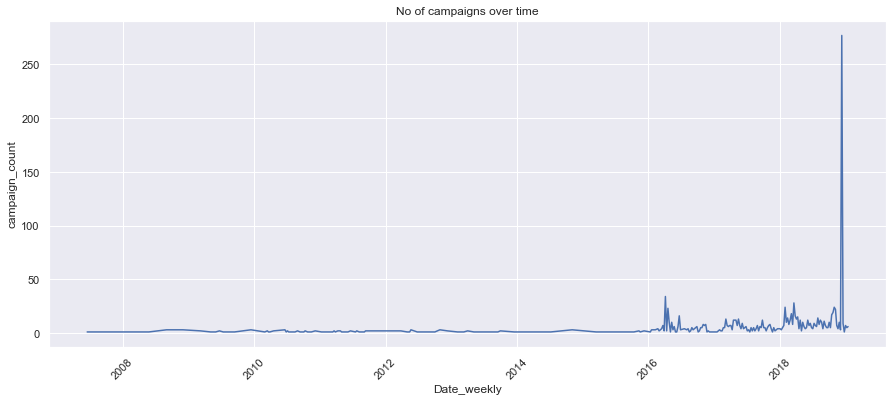

In [22]:
sns.set(rc={'figure.figsize':(15,6)})
#g = sns.FacetGrid(row="Date_weekly", data=df_camp)
#g.map(sns.lineplot, "Date_weekly", "count")

sns.lineplot(x="Date_weekly", y="campaign_count", data=df_camp)

# ax=g.axes
# labels = ax.get_xticklabels() # get x labels
# for i,l in enumerate(labels):
#     if(i%2 == 0): labels[i] = '' # skip even labels
# ax.set_xticklabels(labels, rotation=45)
plt.xticks(rotation=45)
plt.title('No of campaigns over time')
plt.show()


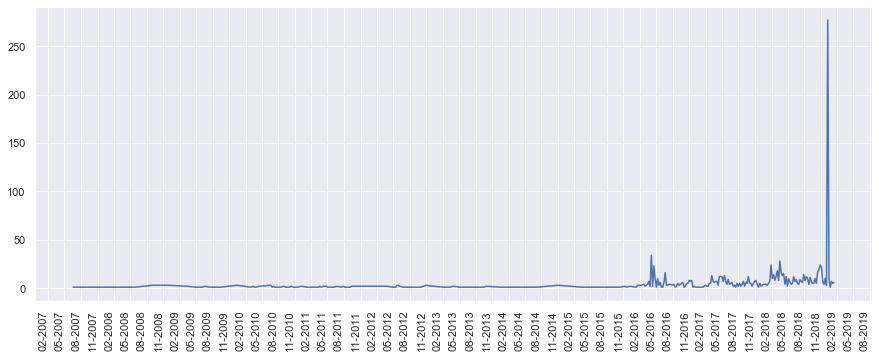

In [23]:
# Plot
sns.set(rc={'figure.figsize':(15,6)})

plt.figure()
plt.plot(df_camp['Date_weekly'], df_camp['campaign_count'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.xticks(rotation=90)
plt.show()

**Email**

In [24]:
df_email=pd.read_csv('vr__VR_Email_History_Contact__c.csv')
df_email.head()

,Id,OwnerId,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,vr__Bounced__c,...,vr__Email_ID__c,vr__Email_Type__c,vr__List_Type__c,vr__Mail_Date__c,vr__Clicked_Links__c,vr__Company_Hash__c,vr__Contact__c,vr__Opened__c,vr__Sent__c,vr__Unsubscribed__c
0,a0Z0z00000DIN2LEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,0035000000e6Gn9AAE,0,1,0
1,a0Z0z00000DIN2MEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,0033800002ZBO9ZAAX,0,1,0
2,a0Z0z00000DIN2NEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,003500000225PVEAA2,0,1,0
3,a0Z0z00000DIN2OEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,0033800002iDRB4AAO,0,1,0
4,a0Z0z00000DIN2PEAX,00550000000ztRtAAI,0,Apprenti,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,00550000000ztRtAAI,2018-09-28 17:21:39,0,...,27057811,canvas,Salesforce Mass Email,2018-09-28 17:25:00,NaN,c75c5a42fe,0033800002gzSfaAAE,0,1,0


In [25]:
df_email=df_email[['vr__Mail_Date__c','vr__Clicked__c','vr__Opened__c','vr__Sent__c']]
df_email['vr__Mail_Date__c']=pd.to_datetime(df_email['vr__Mail_Date__c'])
df_email["Day_of_Week"] = df_email['vr__Mail_Date__c'].dt.weekday
df_email["Date_weekly"] = df_email.apply(lambda x: x['vr__Mail_Date__c'] - timedelta(days=x['Day_of_Week']), axis=1)
df_email["Date_weekly"] = df_email["Date_weekly"].dt.date
df_email["Date_weekly"]=pd.to_datetime(df_email["Date_weekly"])
df_email.head()

,vr__Mail_Date__c,vr__Clicked__c,vr__Opened__c,vr__Sent__c,Day_of_Week,Date_weekly
0,2018-09-28 17:25:00,0,0,1,4,2018-09-24
1,2018-09-28 17:25:00,0,0,1,4,2018-09-24
2,2018-09-28 17:25:00,0,0,1,4,2018-09-24
3,2018-09-28 17:25:00,0,0,1,4,2018-09-24
4,2018-09-28 17:25:00,0,0,1,4,2018-09-24


In [26]:
df_email['Date_weekly'].min(),df_email['Date_weekly'].max()

(Timestamp('2008-04-28 00:00:00'), Timestamp('2019-01-07 00:00:00'))

In [27]:
df_email=df_email[['Date_weekly','vr__Sent__c']]
df_email=df_email.groupby('Date_weekly').sum()
df_email.reset_index(inplace=True)

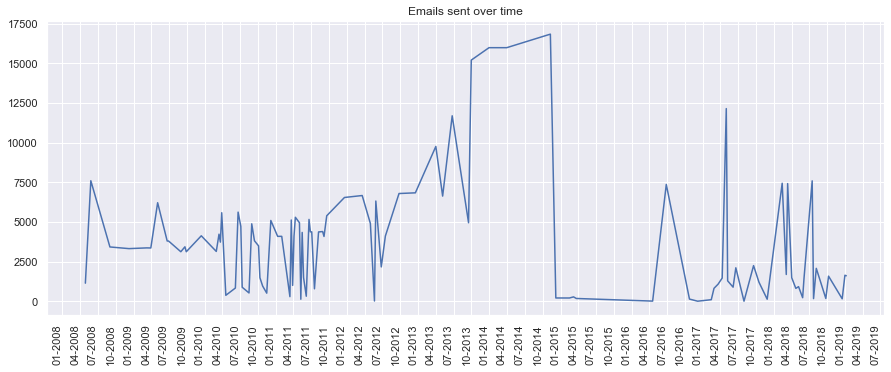

In [28]:
# Plot
sns.set(rc={'figure.figsize':(15,6)})

plt.figure()
plt.plot(df_email['Date_weekly'], df_email['vr__Sent__c'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.xticks(rotation=90)
plt.title('Emails sent over time')
plt.show()

**Donations/opportunites**

In [29]:
df_donate=pd.read_csv('SalesForce_Opportunity.csv')
df_donate.head()

,Id,IsDeleted,AccountId,RecordTypeId,IsPrivate,StageName,StageSortOrder,Amount,Probability,ExpectedRevenue,...,stayclassy__Raw_Total_Gross_Amount__c,Event_Donation__c,Event_Sponsorship__c,Sponsorship_Type__c,Event_Donation_Type__c,Date_Letter_Sent__c,Tax_Letter_Sent_Through_Classy__c,Recurring_Donation_Frequency__c,Tier__c,stayclassy__Applied_FOT_Percent__c
0,0060z00001vL8DcAAK,0,0013800001E5JgdAAF,012500000000r6E,0,Closed Won,11.0,26.38,100,26.38,...,25.0,0.0,0.0,NaN,NaN,NaN,1.0,Monthly,NaN,NaN
1,0060z00001vL8MeAAK,0,0010z00001ShnMYAAZ,012500000000r6E,0,Closed Lost,12.0,127.20,0,0.00,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,0060z00001vL8ReAAK,0,0013800001BR7dMAAT,012500000000r6E,0,Closed Won,11.0,0.00,100,0.00,...,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,0060z00001vL8TBAA0,0,0013800001HI54mAAD,012500000000r6E,0,Closed Won,11.0,12721.09,100,12721.09,...,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,0060z00001vL8gWAAS,0,00138000019svbeAAA,012500000000r6E,0,Closed Won,11.0,50.00,100,50.00,...,50.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [30]:
df_donate=df_donate[['CreatedDate','ExpectedRevenue']]
df_donate['CreatedDate']=pd.to_datetime(df_donate['CreatedDate'])
df_donate["Day_of_Week"] = df_donate['CreatedDate'].dt.weekday
df_donate["Date_weekly"] = df_donate.apply(lambda x: x['CreatedDate'] - timedelta(days=x['Day_of_Week']), axis=1)
df_donate["Date_weekly"] = df_donate["Date_weekly"].dt.date
df_donate["Date_weekly"]=pd.to_datetime(df_donate["Date_weekly"])
df_donate.head()

,CreatedDate,ExpectedRevenue,Day_of_Week,Date_weekly
0,2018-08-14 09:23:00,26.38,1,2018-08-13
1,2018-08-14 12:50:00,0.00,1,2018-08-13
2,2018-08-14 13:43:00,0.00,1,2018-08-13
3,2018-08-14 13:50:00,12721.09,1,2018-08-13
4,2018-08-14 15:32:00,50.00,1,2018-08-13


In [31]:
df_donate['Date_weekly'].min(),df_donate['Date_weekly'].max()

(Timestamp('2007-06-11 00:00:00'), Timestamp('2019-01-14 00:00:00'))

In [32]:
datetime(2007, 6, 11).weekday()

0

0 is Monday

In [33]:
df_donate=df_donate[['Date_weekly','ExpectedRevenue']]
df_donate=df_donate.groupby('Date_weekly').sum()
df_donate.reset_index(inplace=True)

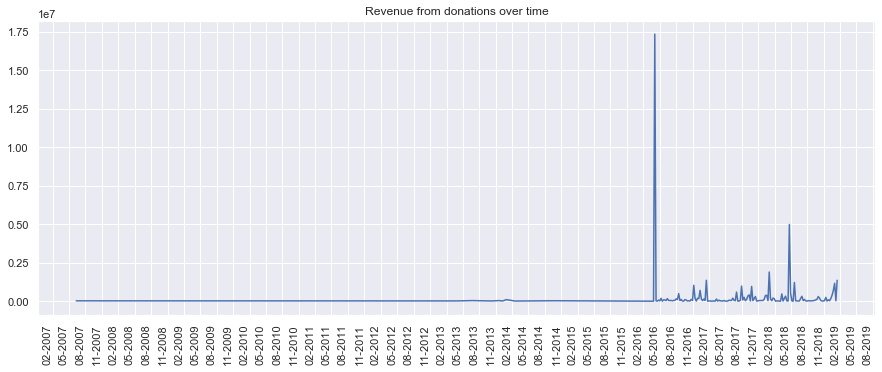

In [34]:
# Plot
sns.set(rc={'figure.figsize':(15,6)})

plt.figure()
plt.plot(df_donate['Date_weekly'], df_donate['ExpectedRevenue'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.xticks(rotation=90)
plt.title('Revenue from donations over time')
plt.show()

**Individual Donations**

In [35]:
df_ind=pd.read_csv('SalesForce_Opportunity.csv')
df_ind=df_ind[df_ind['Donation_Type__c']=='Individual Donor']
df_ind.head()

,Id,IsDeleted,AccountId,RecordTypeId,IsPrivate,StageName,StageSortOrder,Amount,Probability,ExpectedRevenue,...,stayclassy__Raw_Total_Gross_Amount__c,Event_Donation__c,Event_Sponsorship__c,Sponsorship_Type__c,Event_Donation_Type__c,Date_Letter_Sent__c,Tax_Letter_Sent_Through_Classy__c,Recurring_Donation_Frequency__c,Tier__c,stayclassy__Applied_FOT_Percent__c
0,0060z00001vL8DcAAK,0,0013800001E5JgdAAF,012500000000r6E,0,Closed Won,11.0,26.38,100,26.38,...,25.00,0.0,0.0,NaN,NaN,NaN,1.0,Monthly,NaN,NaN
6,0060z00001vL8sXAAS,0,0010z00001ShnUrAAJ,012500000000r6E,0,Closed Won,11.0,200.00,100,200.00,...,200.00,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
7,0060z00001vL8sYAAS,0,0013800001IYZEVAA5,012500000000r6E,0,Closed Won,11.0,25.00,100,25.00,...,25.00,0.0,0.0,NaN,NaN,NaN,1.0,Monthly,NaN,NaN
8,0060z00001vL8sZAAS,0,0013800001DIWBnAAP,012500000000r6E,0,Closed Won,11.0,20.96,100,20.96,...,20.96,0.0,0.0,NaN,NaN,NaN,1.0,Monthly,NaN,NaN
10,0060z00001vL8scAAC,0,0010z00001ShnUtAAJ,012500000000r6E,0,Closed Won,11.0,20.64,100,20.64,...,20.64,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,3.2


In [36]:
df_ind=df_ind[['CreatedDate','ExpectedRevenue']]
df_ind['CreatedDate']=pd.to_datetime(df_ind['CreatedDate'])
df_ind["Day_of_Week"] = df_ind['CreatedDate'].dt.weekday
df_ind["Date_weekly"] = df_ind.apply(lambda x: x['CreatedDate'] - timedelta(days=x['Day_of_Week']), axis=1)
df_ind["Date_weekly"] = df_ind["Date_weekly"].dt.date
df_ind["Date_weekly"]=pd.to_datetime(df_ind["Date_weekly"])
df_ind.head()

,CreatedDate,ExpectedRevenue,Day_of_Week,Date_weekly
0,2018-08-14 09:23:00,26.38,1,2018-08-13
6,2018-08-14 16:31:00,200.00,1,2018-08-13
7,2018-08-14 16:31:00,25.00,1,2018-08-13
8,2018-08-14 16:31:00,20.96,1,2018-08-13
10,2018-08-14 16:31:00,20.64,1,2018-08-13


In [37]:
df_ind=df_ind[['Date_weekly','ExpectedRevenue']]
df_ind.columns=['Date_weekly','Ind Donor Revenue']
df_ind=df_ind.groupby('Date_weekly').sum()
df_ind.reset_index(inplace=True)

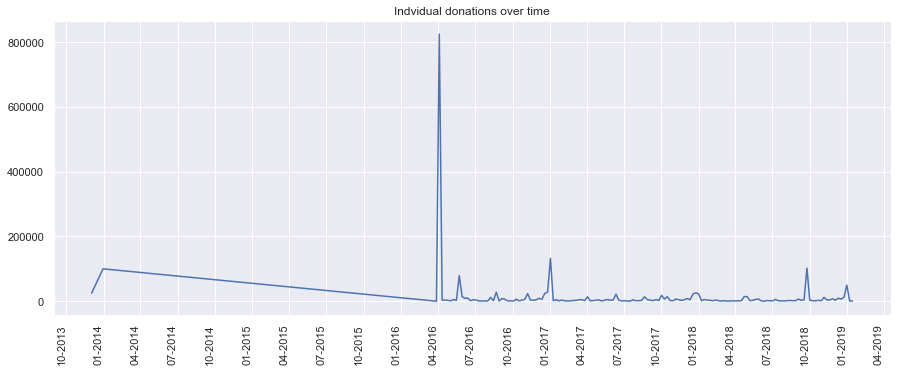

In [38]:
# Plot
sns.set(rc={'figure.figsize':(15,6)})

plt.figure()
plt.plot(df_ind['Date_weekly'], df_ind['Ind Donor Revenue'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.xticks(rotation=90)
plt.title('Indvidual donations over time')
plt.show()

**Contacts**

In [39]:
df_cont=pd.read_csv('SalesForce_Contact.csv',encoding="iso-8859-1")
df_cont.head()

,Id,AccountId,RecordTypeId,MailingState,MailingPostalCode,MailingCountry,LeadSource,OwnerId,HasOptedOutOfEmail,HasOptedOutOfFax,...,Send_Green_Survey__c,Professional_Certification__c,TS_Referral_Requested_By__c,RealZip__RealZip__c,Discharge_Type__c,Discharge_Disposition__c,Date_Turned_Black__c,Litmos__Litmos_Login_Access__c,Litmos__Total_Sum_Percentages__c,Willing_to_Relocate_to_High_Risk_Area__c
0,0030z00002PrWd6AAF,0015000000KUwKAAA1,01238000000UVfW,CA,95821,United States,NaN,00550000000ztRtAAI,0,0,...,0,NaN,NaN,a5D38000000I4fJEAS,NaN,NaN,NaN,No,NaN,0.0
1,0030z00002PrWdBAAV,0015000000KUwKAAA1,01238000000UVfW,VA,NaN,United States,NaN,00538000005ZA5kAAG,0,0,...,0,NaN,NaN,a5D38000000I8CkEAK,NaN,NaN,NaN,No,NaN,0.0
2,0030z00002PrWflAAF,0015000000KUwKAAA1,01238000000UVfW,GA,31905,United States,NaN,005380000063Mg0AAE,0,0,...,0,NaN,NaN,a5D38000000I8xAEAS,Honorable Discharge,NaN,NaN,No,NaN,0.0
3,0030z00002PrWgPAAV,0015000000KUwKAAA1,01238000000UVfW,MI,48628,United States,NaN,00550000001zVqjAAE,0,0,...,0,NaN,NaN,a5D38000000I9lSEAS,NaN,NaN,NaN,No,NaN,0.0
4,0030z00002PrWi1AAF,0015000000KUwKAAA1,01238000000UVfW,ID,83815,United States,NaN,00538000005F2ADAA0,0,0,...,0,NaN,NaN,a5D38000000I35QEAS,NaN,NaN,8/9/2018 0:00,No,NaN,0.0


In [40]:
df_cont=df_cont[['CreatedDate']]
df_cont['count_application']=1
df_cont['CreatedDate']=pd.to_datetime(df_cont['CreatedDate'])
df_cont["Day_of_Week"] = df_cont['CreatedDate'].dt.weekday
df_cont["Date_weekly"] = df_cont.apply(lambda x: x['CreatedDate'] - timedelta(days=x['Day_of_Week']), axis=1)
df_cont["Date_weekly"] = df_cont["Date_weekly"].dt.date
df_cont["Date_weekly"]=pd.to_datetime(df_cont["Date_weekly"])
df_cont.head()

,CreatedDate,count_application,Day_of_Week,Date_weekly
0,2018-08-05 05:28:00,1,6,2018-07-30
1,2018-08-05 05:59:00,1,6,2018-07-30
2,2018-08-05 11:45:00,1,6,2018-07-30
3,2018-08-05 14:05:00,1,6,2018-07-30
4,2018-08-05 15:41:00,1,6,2018-07-30


In [41]:
df_cont['Date_weekly'].min(),df_cont['Date_weekly'].max()

(Timestamp('2007-06-04 00:00:00'), Timestamp('2019-01-14 00:00:00'))

In [42]:
df_cont=df_cont[['Date_weekly','count_application']]
df_cont=df_cont.groupby('Date_weekly').sum()
df_cont.reset_index(inplace=True)

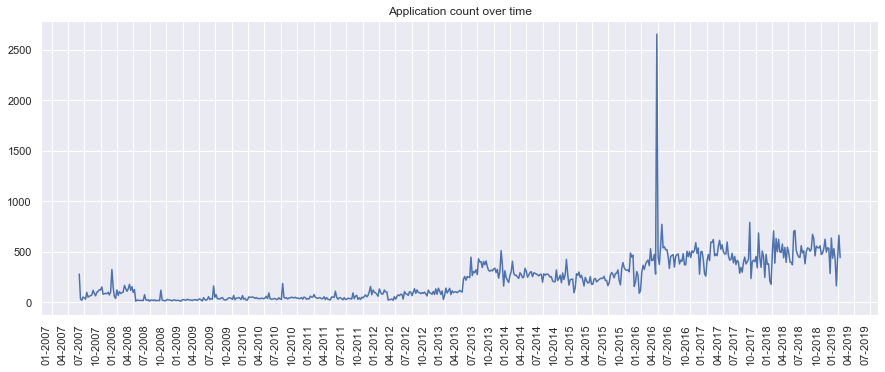

In [43]:
# Plot
sns.set(rc={'figure.figsize':(15,6)})

plt.figure()
plt.plot(df_cont['Date_weekly'], df_cont['count_application'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.xticks(rotation=90)
plt.title('Application count over time')
plt.show()

**Create a date range**

date range is datetime.date(2008, 4, 28), datetime.date(2019, 1, 7)

In [44]:
df_date=pd.DataFrame()

In [45]:
df_date['Date_weekly']=pd.date_range("20080428", "20190107", freq='W-MON')
df_date.head()

,Date_weekly
0,2008-04-28
1,2008-05-05
2,2008-05-12
3,2008-05-19
4,2008-05-26


In [81]:
df_date.dtypes

Date_weekly    datetime64[ns]
dtype: object

In [86]:
df_cont.dtypes

Date_weekly          datetime64[ns]
count_application             int64
dtype: object

**Weekly data**

In [46]:
df_merged=pd.merge(df_date,df_camp,how='left',on='Date_weekly')
df_merged=pd.merge(df_merged,df_email,how='left',on='Date_weekly')
df_merged=pd.merge(df_merged,df_donate,how='left',on='Date_weekly')
df_merged=pd.merge(df_merged,df_cont,how='left',on='Date_weekly')
df_merged=pd.merge(df_merged,df_ind,how='left',on='Date_weekly')
df_merged
# data_frames =[df_date,df_camp,df_email,df_donate,df_cont]
# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date_weekly'],how='left'), data_frames)

,Date_weekly,campaign_count,vr__Sent__c,ExpectedRevenue,count_application,Ind Donor Revenue
0,2008-04-28,NaN,1146.0,NaN,19,NaN
1,2008-05-05,NaN,NaN,NaN,16,NaN
2,2008-05-12,NaN,NaN,NaN,17,NaN
3,2008-05-19,NaN,NaN,NaN,16,NaN
4,2008-05-26,1.0,7602.0,NaN,15,NaN
...,...,...,...,...,...,...
554,2018-12-10,277.0,NaN,179257.200,530,9360.370
555,2018-12-17,9.0,162.0,395131.525,423,6599.025
556,2018-12-24,1.0,NaN,714624.820,161,12163.020
557,2018-12-31,7.0,1646.0,1162590.440,446,49607.850


In [47]:
df_merged.isnull().sum()

Date_weekly            0
campaign_count       334
vr__Sent__c          456
ExpectedRevenue      400
count_application      0
Ind Donor Revenue    411
dtype: int64

In [55]:
#df_merged.to_csv("Weekly_data.csv")

**Monthly**

In [56]:
mnth=df_merged.copy()

In [57]:
mnth['Date_monthly'] = mnth['Date_weekly'].apply(lambda dt: dt.replace(day=1))
#mnth['Date_yearly']=mnth['Date_yearly'].apply(lambda dt: dt.replace(month=6) if dt.month<=6 else dt.replace(month=12))
mnth

,Date_weekly,campaign_count,vr__Sent__c,ExpectedRevenue,count_application,Ind Donor Revenue,Date_monthly
0,2008-04-28,NaN,1146.0,NaN,19,NaN,2008-04-01
1,2008-05-05,NaN,NaN,NaN,16,NaN,2008-05-01
2,2008-05-12,NaN,NaN,NaN,17,NaN,2008-05-01
3,2008-05-19,NaN,NaN,NaN,16,NaN,2008-05-01
4,2008-05-26,1.0,7602.0,NaN,15,NaN,2008-05-01
...,...,...,...,...,...,...,...
554,2018-12-10,277.0,NaN,179257.200,530,9360.370,2018-12-01
555,2018-12-17,9.0,162.0,395131.525,423,6599.025,2018-12-01
556,2018-12-24,1.0,NaN,714624.820,161,12163.020,2018-12-01
557,2018-12-31,7.0,1646.0,1162590.440,446,49607.850,2018-12-01


In [59]:
mnth=mnth[['Date_monthly','campaign_count', 'vr__Sent__c', 'ExpectedRevenue','count_application','Ind Donor Revenue']]
mnth=mnth.groupby('Date_monthly').sum()
mnth.reset_index(inplace=True)
mnth

,Date_monthly,campaign_count,vr__Sent__c,ExpectedRevenue,count_application,Ind Donor Revenue
0,2008-04-01,0.0,1146.0,0.000,19,0.000
1,2008-05-01,1.0,7602.0,0.000,64,0.000
2,2008-06-01,0.0,0.0,0.000,147,0.000
3,2008-07-01,0.0,0.0,0.000,79,0.000
4,2008-08-01,0.0,0.0,0.000,61,0.000
...,...,...,...,...,...,...
125,2018-09-01,28.0,182.0,297696.655,2193,115703.755
126,2018-10-01,75.0,1589.0,567808.600,2607,9917.120
127,2018-11-01,43.0,0.0,391508.150,1990,27055.590
128,2018-12-01,297.0,1808.0,2480291.445,1995,80877.535


In [60]:
#mnth.to_csv('Monthly_data.csv')

**Half yearly data**

In [48]:
df_mnth=df_merged.copy()

In [49]:
df_mnth['Date_yearly'] = df_mnth['Date_weekly'].apply(lambda dt: dt.replace(day=1))
df_mnth['Date_yearly']=df_mnth['Date_yearly'].apply(lambda dt: dt.replace(month=6) if dt.month<=6 else dt.replace(month=12))
df_mnth

,Date_weekly,campaign_count,vr__Sent__c,ExpectedRevenue,count_application,Ind Donor Revenue,Date_yearly
0,2008-04-28,NaN,1146.0,NaN,19,NaN,2008-06-01
1,2008-05-05,NaN,NaN,NaN,16,NaN,2008-06-01
2,2008-05-12,NaN,NaN,NaN,17,NaN,2008-06-01
3,2008-05-19,NaN,NaN,NaN,16,NaN,2008-06-01
4,2008-05-26,1.0,7602.0,NaN,15,NaN,2008-06-01
...,...,...,...,...,...,...,...
554,2018-12-10,277.0,NaN,179257.200,530,9360.370,2018-12-01
555,2018-12-17,9.0,162.0,395131.525,423,6599.025,2018-12-01
556,2018-12-24,1.0,NaN,714624.820,161,12163.020,2018-12-01
557,2018-12-31,7.0,1646.0,1162590.440,446,49607.850,2018-12-01


In [50]:
df_mnth.columns

Index(['Date_weekly', 'campaign_count', 'vr__Sent__c', 'ExpectedRevenue',
       'count_application', 'Ind Donor Revenue', 'Date_yearly'],
      dtype='object')

In [51]:
df_mnth=df_mnth[['Date_yearly','campaign_count', 'vr__Sent__c', 'ExpectedRevenue','count_application','Ind Donor Revenue']]
df_mnth=df_mnth.groupby('Date_yearly').sum()
df_mnth.reset_index(inplace=True)
df_mnth

,Date_yearly,campaign_count,vr__Sent__c,ExpectedRevenue,count_application,Ind Donor Revenue
0,2008-06-01,1.0,8748.0,0.000000e+00,230,0.000
1,2008-12-01,6.0,6753.0,0.000000e+00,561,0.000
2,2009-06-01,6.0,20560.0,0.000000e+00,813,0.000
3,2009-12-01,6.0,13825.0,0.000000e+00,955,0.000
4,2010-06-01,11.0,23550.0,0.000000e+00,1052,0.000
5,2010-12-01,14.0,26422.0,0.000000e+00,1208,0.000
6,2011-06-01,16.0,44850.0,0.000000e+00,1100,0.000
7,2011-12-01,10.0,29979.0,0.000000e+00,1626,0.000
8,2012-06-01,10.0,20099.0,0.000000e+00,1824,0.000
9,2012-12-01,9.0,17752.0,0.000000e+00,2495,0.000


**Quarterly data**

In [52]:
df_qrtr=df_merged.copy()

In [53]:
df_qrtr['Date_quarterly'] = df_qrtr['Date_weekly'].apply(lambda dt: dt.replace(day=1))
#frame[['b','c']].apply(lambda x: x['c'] if x['c']>0 else x['b'], axis=1)
df_qrtr['Date_quarterly']=df_qrtr['Date_quarterly'].apply(lambda dt: dt.replace(month=4) if dt.month<=4 else dt.replace(month=8) if dt.month<=8 else dt.replace(month=12))
df_qrtr

,Date_weekly,campaign_count,vr__Sent__c,ExpectedRevenue,count_application,Ind Donor Revenue,Date_quarterly
0,2008-04-28,NaN,1146.0,NaN,19,NaN,2008-04-01
1,2008-05-05,NaN,NaN,NaN,16,NaN,2008-08-01
2,2008-05-12,NaN,NaN,NaN,17,NaN,2008-08-01
3,2008-05-19,NaN,NaN,NaN,16,NaN,2008-08-01
4,2008-05-26,1.0,7602.0,NaN,15,NaN,2008-08-01
...,...,...,...,...,...,...,...
554,2018-12-10,277.0,NaN,179257.200,530,9360.370,2018-12-01
555,2018-12-17,9.0,162.0,395131.525,423,6599.025,2018-12-01
556,2018-12-24,1.0,NaN,714624.820,161,12163.020,2018-12-01
557,2018-12-31,7.0,1646.0,1162590.440,446,49607.850,2018-12-01


In [54]:
df_qrtr=df_qrtr[['Date_quarterly','campaign_count', 'vr__Sent__c', 'ExpectedRevenue','count_application','Ind Donor Revenue']]
df_qrtr=df_qrtr.groupby('Date_quarterly').sum()
df_qrtr.reset_index(inplace=True)
df_qrtr

,Date_quarterly,campaign_count,vr__Sent__c,ExpectedRevenue,count_application,Ind Donor Revenue
0,2008-04-01,0.0,1146.0,0.000000e+00,19,0.000
1,2008-08-01,1.0,7602.0,0.000000e+00,351,0.000
2,2008-12-01,6.0,6753.0,0.000000e+00,421,0.000
3,2009-04-01,2.0,6735.0,0.000000e+00,393,0.000
4,2009-08-01,6.0,16953.0,0.000000e+00,745,0.000
5,2009-12-01,4.0,10697.0,0.000000e+00,630,0.000
6,2010-04-01,7.0,17086.0,0.000000e+00,764,0.000
7,2010-08-01,10.0,17496.0,0.000000e+00,791,0.000
8,2010-12-01,8.0,15390.0,0.000000e+00,705,0.000
9,2011-04-01,9.0,24044.0,0.000000e+00,701,0.000


**Modelling**

In [71]:
df=pd.read_excel('Monthly_data.xlsx',sheet_name="Monthly_data")
df=df[['Date_monthly','application count']]
df = df[:-1]
df.head()

,Date_monthly,application count
0,2008-04-01,19
1,2008-05-01,64
2,2008-06-01,147
3,2008-07-01,79
4,2008-08-01,61


In [72]:
y = df.set_index(['Date_monthly'])
y.head(5)

,application count
Date_monthly,
2008-04-01,19
2008-05-01,64
2008-06-01,147
2008-07-01,79
2008-08-01,61


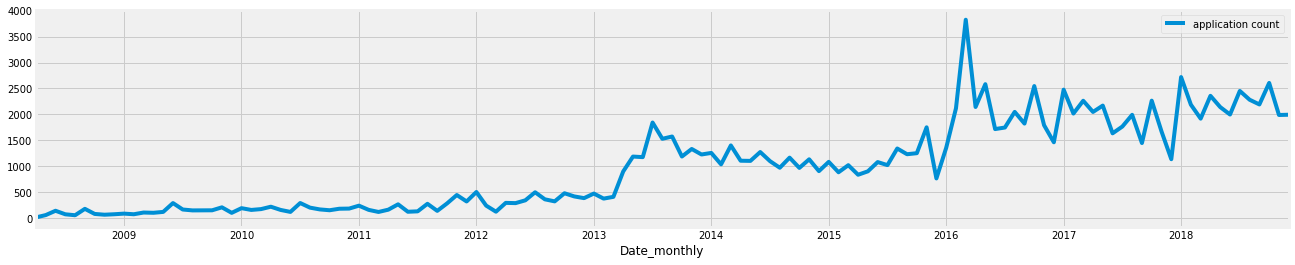

In [73]:
y.plot(figsize=(20, 4))
plt.show()

**Transformations**

Converting to log10

In [64]:
#y['application count']=np.log10(y['application count'])
#pt = PowerTransformer()

#y=pt.fit_transform(y)
#y.plot(figsize=(20, 4))
#plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

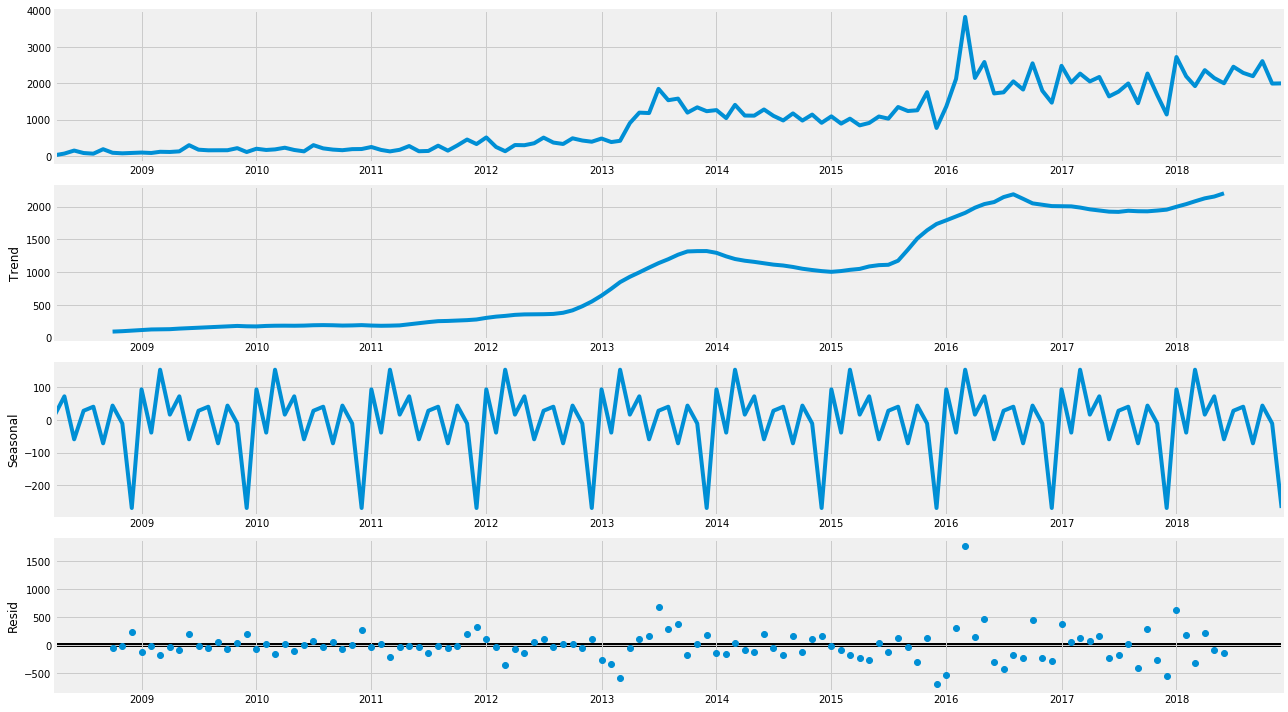

In [74]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [75]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [76]:
par,s_par,res=[],[],[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
            par.append(param)
            s_par.append(param_seasonal)
            res.append(results.aic)
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2199.9211584624754
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1932.071581826684
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1700.5388950625588
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1805.0865774776325
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1626.4057436318344
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1445.846098030584
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1722.1038830204836
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1457.2343293580643
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:1253.9571437433947
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1819.1247786211036
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1781.4636998172873
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1609.0053119761374
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1639.2223322796947
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1626.3404369720968
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:1433.9423047276175
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1496.3699278388865
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1440.485753223571
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:1255.776099560

ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1549.4085279284986
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1495.949663642224
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1331.086941948225
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:1428.8611801284035
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:1359.2571503856338
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:1181.0421339929217
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1529.5575770710027
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:1531.5474640863754
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1491.9996564793794
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1377.319500027877
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1373.3280709574926
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:1333.0728106224437
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:1242.0975858402353
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:1226.2247414122503
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:1182.6907439354534
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:2000.1307080594918
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1805.1334532613469
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:1624.411723041

ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:1235.632150445038
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:1221.8171119010485
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:1209.4501386269524
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:1835.1856705939122
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1667.5721489001737
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1504.9831829286986
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1698.1406384394004
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:1509.9454661300442
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:1344.9833920768617
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:1626.6055463095383
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:1378.9457043454345
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:1191.1881190131392
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:1692.993542462677
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:1667.7690940543482
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:1506.4578653812155
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:1547.7337939886045
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:1511.3241270956798
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:1346.60605777

ARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:1674.481918327181
ARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:1662.5087054716246
ARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:1499.5212086334618
ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:1531.5129589462847
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1508.454782427143
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:1341.0641676127814
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:1404.8792234497992
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:1368.7326480786724
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:1191.2448428514742
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:1512.087565299294
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:1514.031240907341
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:1500.9411244556602
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:1360.3919126105206
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:1356.4379286196747
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:1343.0562333444739
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:1222.1158677966382
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:1208.3136072911802
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:1192.3072531625

ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:1350.3585424938278
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:1346.8886602825814
ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:1348.2102384544173
ARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:1214.3775265730535
ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:1198.0267195374963
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:1196.430110615297
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:1834.933290055956
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1667.1852765881813
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1504.5022277563887
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1704.0697859420898
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1509.5017203267919
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:1345.3280889077719
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:1633.916219535152
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:1385.111974082587
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:1195.1658421179961
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1665.4363708064734
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:1667.4238669744695
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:1506.0046523445

In [77]:
print('Best ARIMA{}x{}12 - AIC:{}'.format(par[res.index(min(res))],s_par[res.index(min(res))],min(res)))

Best ARIMA(0, 2, 2)x(0, 2, 2, 12)12 - AIC:1168.5358033571135


In [78]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 2, 2),
                                seasonal_order=(0, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5597      5.899     -0.264      0.791     -13.122      10.002
ma.L2          0.5597      3.298      0.170      0.865      -5.904       7.023
ma.S.L12      -2.0793      5.829     -0.357      0.721     -13.504       9.346
ma.S.L24       1.1119      6.804      0.163      0.870     -12.224      14.448
sigma2      1.261e+05   5.77e-05   2.18e+09      0.000    1.26e+05    1.26e+05


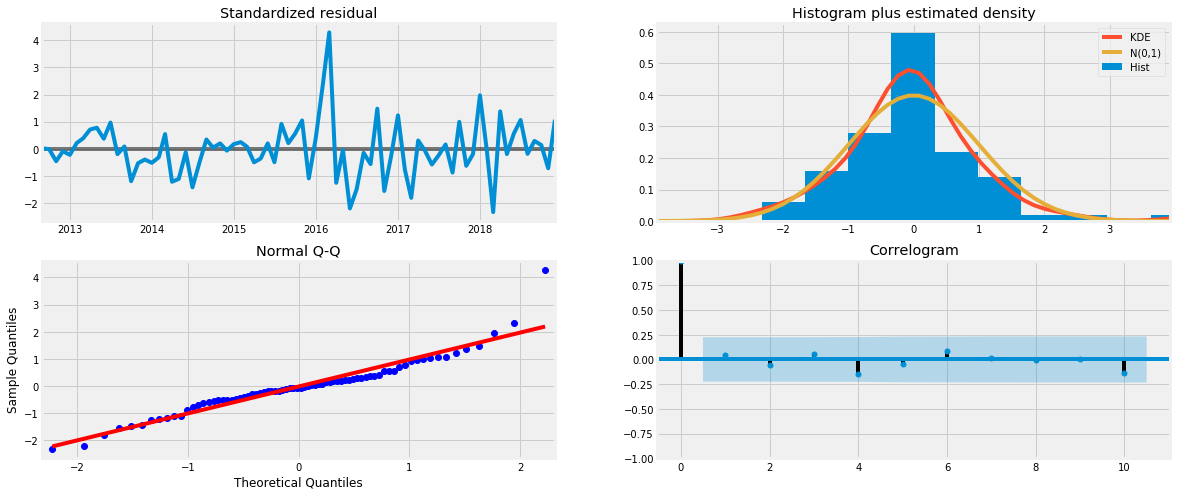

In [79]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

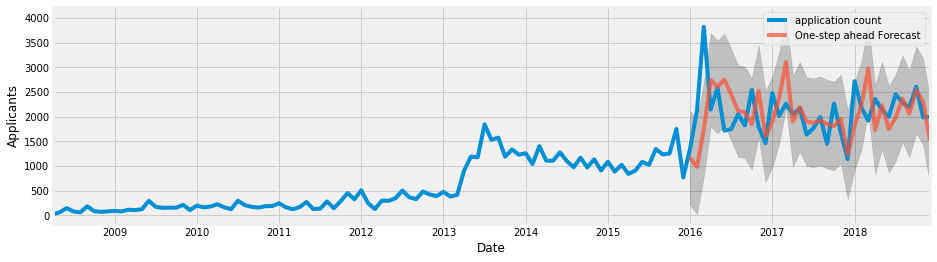

In [80]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2008':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Applicants')
plt.legend()
plt.show()

In [81]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted.values - y_truth.values) ** 2).mean()
mape_score = (abs(y_forecasted.values - y_truth.values)/y_truth.values)*100
mape_mean = mape_score.mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))
print('The MAPE score is {}'.format(round(mape_mean, 2)))

The Mean Squared Error is 438372.41
The Root Mean Squared Error is 662.1
The MAPE score is 25.56


**Predict for next 2 years**

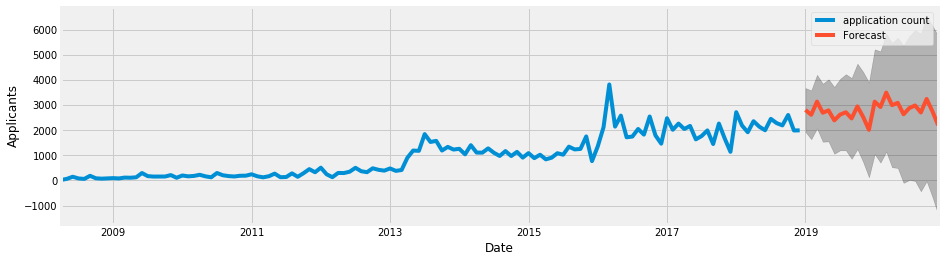

In [82]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Applicants')
plt.legend()
plt.show()

In [46]:
#y = df.set_index(['Date_monthly'])
#y.head(5)

,application count
Date_monthly,
2008-04-01,19
2008-05-01,64
2008-06-01,147
2008-07-01,79
2008-08-01,61


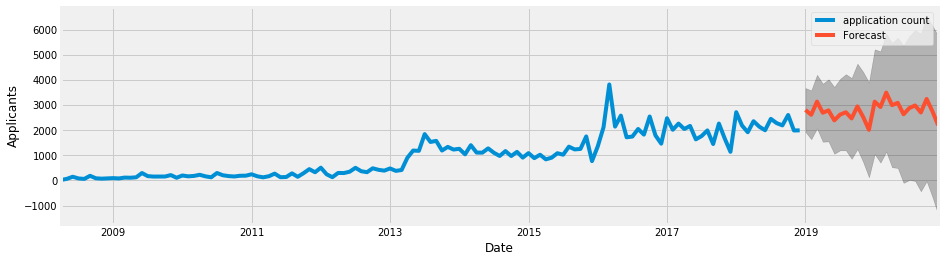

In [83]:
pred_uc = results.get_forecast(steps=24)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Applicants')
plt.legend()
plt.show()

In [84]:
y_forecasted = pred.predicted_mean
y_forecasted.head(24)

2016-01-01    1163.572133
2016-02-01     984.771252
2016-03-01    1741.676384
2016-04-01    2747.126198
2016-05-01    2603.066972
2016-06-01    2753.511950
2016-07-01    2449.849420
2016-08-01    2118.845777
2016-09-01    2088.293073
2016-10-01    1849.552280
2016-11-01    2523.241388
2016-12-01    1599.925615
2017-01-01    1898.762256
2017-02-01    2381.394250
2017-03-01    3108.272475
2017-04-01    1904.634524
2017-05-01    2200.175942
2017-06-01    1900.404585
2017-07-01    1877.364645
2017-08-01    1918.619648
2017-09-01    1849.084338
2017-10-01    1811.226246
2017-11-01    1958.581387
2017-12-01    1226.706188
Freq: MS, dtype: float64

In [43]:
y_truth.head(24)

,application count
Date_monthly,
2016-01-01,3.132900
2016-02-01,3.326131
2016-03-01,3.582404
2016-04-01,3.331225
2016-05-01,3.412124
2016-06-01,3.235276
2016-07-01,3.242790
2016-08-01,3.311754
2016-09-01,3.261263


In [85]:
pred_ci.head(24)

,lower application count,upper application count
2019-01-01,1933.271894,3680.064771
2019-02-01,1643.394717,3587.245620
2019-03-01,2075.366229,4206.174094
2019-04-01,1543.251312,3851.396442
2019-05-01,1554.352871,4027.633993
2019-06-01,1062.660338,3721.859725
2019-07-01,1200.213578,4044.238905
2019-08-01,1201.185185,4230.869192
2019-09-01,861.645802,4077.321042
2019-10-01,1248.107115,4649.926984


In [86]:
forecast = pred_uc.predicted_mean
forecast.head(24)

2019-01-01    2806.668333
2019-02-01    2615.320168
2019-03-01    3140.770162
2019-04-01    2697.323877
2019-05-01    2790.993432
2019-06-01    2392.260032
2019-07-01    2622.226241
2019-08-01    2716.027189
2019-09-01    2469.483422
2019-10-01    2949.017050
2019-11-01    2529.620637
2019-12-01    2015.602478
2020-01-01    3138.051571
2020-02-01    2926.660885
2020-03-01    3499.980195
2020-04-01    2999.480869
2020-05-01    3089.487765
2020-06-01    2635.064654
2020-07-01    2882.088035
2020-08-01    2986.707964
2020-09-01    2706.761556
2020-10-01    3245.943751
2020-11-01    2757.925349
2020-12-01    2196.106756
Freq: MS, dtype: float64

In [26]:
#pd.DataFrame(forecast.head(24)).to_csv('Python_forecast.csv')